In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = './other_corr/CB_86.csv'
df = pd.read_csv(in_file)
df.head()

,id,HIV,CB,group,mPFC_CE,PCC_CE,mPFC_C,PCC_C,mPFC_E,PCC_E,n_aware,n_unaware,n_error,anxiety,apathy,times_log,amount_log,mPFC_A,PCC_A
0,P206,2,2,4,-0.62,-0.08,-1.49,-0.29,-0.88,-0.21,90,38,136,51,12,3.67,4.14,-1.856393,-0.442083
1,P212,1,2,2,1.75,1.29,-0.93,-0.34,-2.68,-1.63,72,16,105,39,12,3.35,3.23,-2.337796,-1.635712
2,P218,1,2,2,0.76,0.05,-1.27,-0.97,-2.03,-1.02,94,16,112,42,12,3.68,3.80,-2.042877,-1.103314
3,P229,2,2,4,-1.03,-0.03,-0.08,0.21,0.95,0.24,47,3,51,48,12,4.00,4.33,1.233351,0.360508
4,P240,1,2,2,0.07,-0.15,-0.84,-0.58,-0.91,-0.43,11,22,34,25,26,3.65,3.33,-2.004850,-1.227277


In [2]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']


#make long form data

df_long = df.melt(
    id_vars =['id', 'HIV', 'CB'],
    value_vars=['mPFC_C', 'PCC_C', 'mPFC_E', 
                'PCC_E', 'times_log', 'amount_log'],
    var_name='metric',
    value_name='value')

df_long[['HIV', 'CB']]
df_long['HIV-status'] = df_long['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df_long['CB-status'] = df_long['CB'].map({2: 'user'})
df_long['group'] = df_long['HIV-status'] + ', ' + df_long['CB-status']

df_long.head()

sns.set_style('white')
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


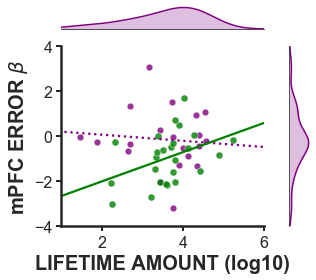

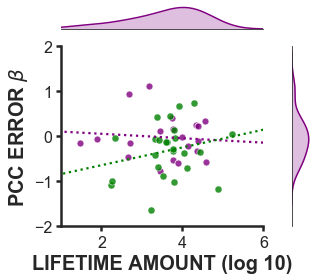

In [18]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='amount_log', y='mPFC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 50000), ylim=(-100, 50000), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='amount_log', y='mPFC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)


# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xlim(1,6)
ax_joint.set_ylim(-4, 4)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('LIFETIME AMOUNT (log10)', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'mPFC ERROR $\beta$', fontsize=20, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.legend().set_visible(False)
ax_joint.lines[0].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2)
fig.tight_layout()
fig.savefig(fname='./figure_6/ERR_mPFC_amount')
fig.show()


###########################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='amount_log', y='PCC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 50000), ylim=(-100, 50000), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='amount_log', y='PCC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xlim(1,6)
ax_joint.set_ylim(-2, 2)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('LIFETIME AMOUNT (log 10)', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'PCC ERROR $\beta$', fontsize=20, fontweight='bold')
ax_joint.legend().set_visible(False)
ax_joint.lines[0].set_linestyle(":")
ax_joint.lines[1].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
fig.set_size_inches((4.5, 4))

fig.tight_layout()
fig.savefig(fname='./figure_6/ERR_PCC_amount')
fig.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = './other_corr/CB_103.csv'
df = pd.read_csv(in_file)
df.head()

,id,HIV,CB,group,mPFC_CE,PCC_CE,mPFC_C,PCC_C,mPFC_E,PCC_E,n_aware,n_unaware,n_error,anxiety,apathy,times_log,amount_log,med_score,cog_fail_total
0,P206,2,2,4,-0.62,-0.08,-1.49,-0.29,-0.88,-0.21,90,38,136,51,12,3.67,4.14,15,31
1,P212,1,2,2,1.75,1.29,-0.93,-0.34,-2.68,-1.63,72,16,105,39,12,3.35,3.23,16,36
2,P218,1,2,2,0.76,0.05,-1.27,-0.97,-2.03,-1.02,94,16,112,42,12,3.68,3.80,14,46
3,P225,2,2,4,-0.23,0.93,2.67,0.92,2.90,-0.02,95,1,96,29,12,3.16,1.86,7,19
4,P229,2,2,4,-1.03,-0.03,-0.08,0.21,0.95,0.24,47,3,51,48,12,4.00,4.33,9,18


In [2]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']


#make long form data

df_long = df.melt(
    id_vars =['id', 'HIV', 'CB'],
    value_vars=['mPFC_C', 'PCC_C', 'mPFC_E', 
                'PCC_E', 'times_log', 'amount_log', 'med_score', 'cog_fail_total'],
    var_name='metric',
    value_name='value')

df_long[['HIV', 'CB']]
df_long['HIV-status'] = df_long['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df_long['CB-status'] = df_long['CB'].map({2: 'user'})
df_long['group'] = df_long['HIV-status'] + ', ' + df_long['CB-status']

df_long.head()

sns.set_style('white')
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


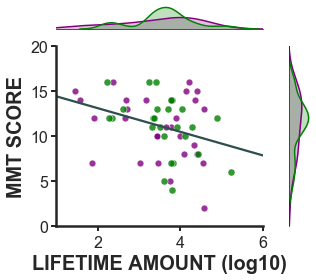

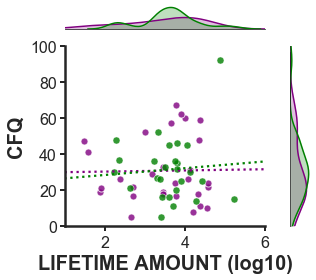

In [3]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='amount_log', y='med_score', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 50000), ylim=(-100, 50000), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='amount_log', y='med_score', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)


# Add the full sample central regression plot to the joint axis
sns.regplot(x='amount_log', y='med_score', data=df, ax=ax_joint,
            color='darkslategray', label='all', truncate=False, scatter=False, ci=None)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['amount_log'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['med_score'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)
# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xlim(1,6)
ax_joint.set_ylim(0, 20)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('LIFETIME AMOUNT (log10)', fontsize=20, fontweight='bold')
ax_joint.set_ylabel('MMT SCORE', fontsize=20, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.legend().set_visible(False)
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[1].set_linestyle("")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2)
fig.tight_layout()
fig.savefig(fname='./figure_6/mmt_amount')
fig.show()




# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='amount_log', y='cog_fail_total', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 50000), ylim=(-100, 50000), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='amount_log', y='cog_fail_total', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['amount_log'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['cog_fail_total'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)
# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xlim(1,6)
ax_joint.set_ylim(0, 100)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('LIFETIME AMOUNT (log10)', fontsize=20, fontweight='bold')
ax_joint.set_ylabel('CFQ', fontsize=20, fontweight='bold')
fig.set_size_inches((4.5, 4))
ax_joint.legend().set_visible(False)
ax_joint.lines[0].set_linestyle(":")
ax_joint.lines[1].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2)
fig.tight_layout()
fig.savefig(fname='./figure_6/cog_fail_amount')
fig.show()